In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data = load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target

print('Input data size : ',X.shape)
print('Input data size : ',Y.shape)
print('Label Names : ',cancer_data.target_names)

n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f'{n_pos} positive samples and {n_neg} negative samples.')

Input data size :  (569, 30)
Input data size :  (569,)
Label Names :  ['malignant' 'benign']
357 positive samples and 212 negative samples.


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

In [7]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',C=1.0,random_state=42)

In [7]:
clf.fit(X_train,Y_train)

SVC(kernel='linear', random_state=42)

In [8]:
accuracy = clf.score(X_test,Y_test)
print(f'The accuracy id : {accuracy*100:.1f}%')

The accuracy id : 95.8%


In [9]:
from sklearn.datasets import load_wine

In [13]:
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target

print('Input data size : ',X.shape)
print('Input data size : ',Y.shape)

print('Lable names : ',wine_data.target_names)

n_class0 = (Y==0).sum()
n_class1 = (Y==1).sum()
n_class2 = (Y==2).sum()
print(f'{n_class0} class0 samples,\n{n_class1} class1 samples\n{n_class2} class2 samples.')

Input data size :  (178, 13)
Input data size :  (178,)
Lable names :  ['class_0' 'class_1' 'class_2']
59 class0 samples,
71 class1 samples
48 class2 samples.


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

In [15]:
clf = SVC(kernel='linear',C=1.0,random_state=42)
clf.fit(X_train,Y_train)

SVC(kernel='linear', random_state=42)

In [16]:
accuracy = clf.score(X_test,Y_test)
print(f' The accuracy is : {accuracy*100:.1f}%')

 The accuracy is : 97.8%


In [18]:
from sklearn.metrics import classification_report

pred = clf.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.c_[# negative class
 (.3, -.8),
 (-1.5, -1),
 (-1.3, -.8),
 (-1.1, -1.3),
 (-1.2, -.3), (-1.3, -.5),
 (-.6, 1.1),
(-1.4, 2.2),
 (1, 1),
 # positive class
 (1.3, .8),
(1.2, .5),
 (.2, -2),
 (.5, -2.4),
 (.2, -2.3),
 (0, -2.7),
 (1.3, 2.1)].T
Y = [-1]*8 + [1]*8

In [5]:
gamma_options = [1,2,4]

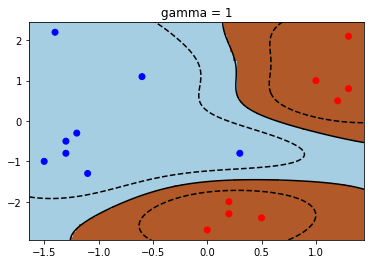

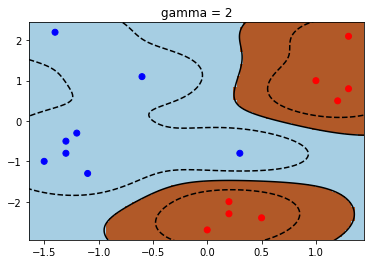

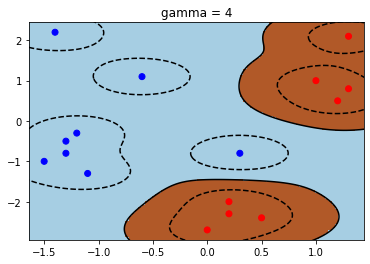

In [10]:
for i,gamma in enumerate(gamma_options,1):
    svm = SVC(kernel='rbf',gamma=gamma)
    svm.fit(X,Y)
    plt.scatter(X[:,0],X[:,1],c=['b']*8+['r']*8,zorder = 10,cmap=plt.cm.Paired)
    plt.axis('tight')
    XX,YY = np.mgrid[-3:3:200j, -3:3:200j]
    Z = svm.decision_function(np.c_[XX.ravel(),YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
    linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title('gamma = %d' % gamma)
    plt.show()